In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta, date
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd 

In [441]:
df = pd.read_csv('traffic.csv')
df.head(7)

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
5,2015-11-01 05:00:00,1,6,20151101051
6,2015-11-01 06:00:00,1,9,20151101061


In [165]:
df.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [437]:
df.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [443]:
df[['Date', 'Time']] = df['DateTime'].str.split(' ', expand=True)

In [444]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
df.drop(df.columns[[0]], axis=1, inplace=True)
df.drop(df.columns[[2]], axis=1, inplace=True)
df.head()

,Junction,Vehicles,Date,Time,Year,Month,Day,Hour
0,1,15,2015-11-01,00:00:00,2015,11,1,0
1,1,13,2015-11-01,01:00:00,2015,11,1,1
2,1,10,2015-11-01,02:00:00,2015,11,1,2
3,1,7,2015-11-01,03:00:00,2015,11,1,3
4,1,9,2015-11-01,04:00:00,2015,11,1,4


### DATA EXPLORATION

In [445]:
df.Date

0       2015-11-01
1       2015-11-01
2       2015-11-01
3       2015-11-01
4       2015-11-01
           ...    
48115   2017-06-30
48116   2017-06-30
48117   2017-06-30
48118   2017-06-30
48119   2017-06-30
Name: Date, Length: 48120, dtype: datetime64[ns]

In [18]:
def make_hist(junction=1):
    data = df[df['Junction'] == junction]
    f, ax = plt.subplots(figsize=(17, 5))
    ax = sns.histplot(data['Vehicles'], kde=True, stat='probability')
    ax.set_title(f'Plot show the distribution of data in junction {junction}')
    ax.grid(True, ls='-.', alpha=0.75)
    plt.show()

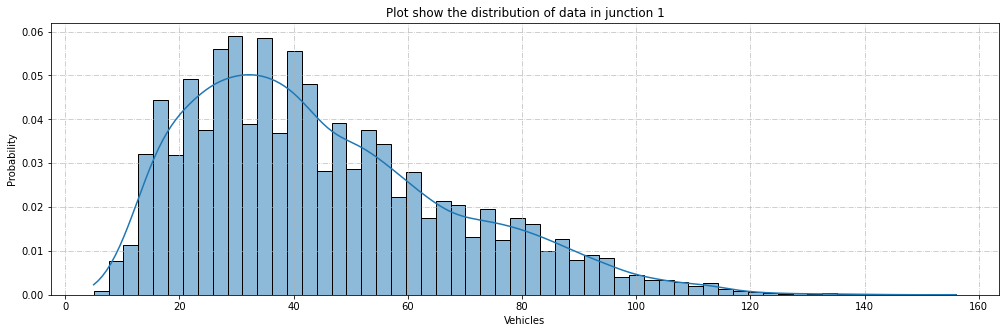

In [19]:
make_hist(1)

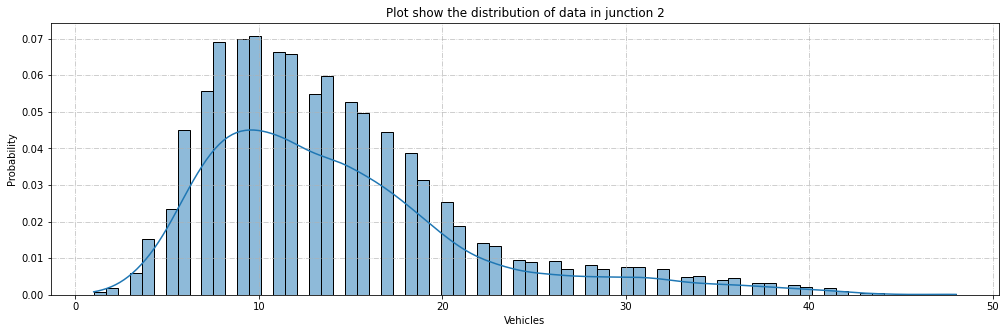

In [20]:
make_hist(2)

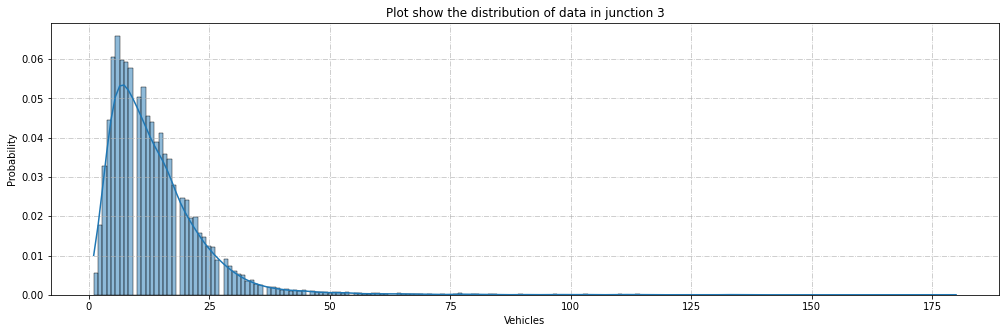

In [21]:
make_hist(3)

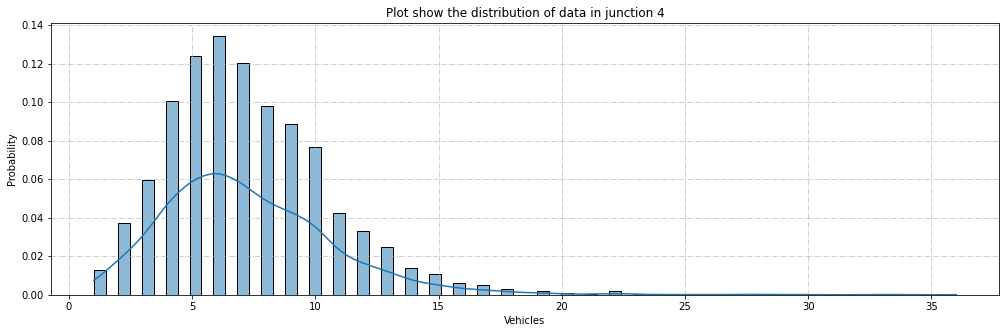

In [22]:
make_hist(4)

### TIME SERIES ANALYSIS SHOWING TRAFFIC TREND

In [91]:
#df = pd.read_csv('traffic.csv')
def make_time_series_plot():
    plt.figure(figsize=(12,10))
    sns.lineplot(x=df['Date'], y = df['Vehicles'], data=df).set(title="Time Series Analysis Show Trend Between Vehicles and Date")

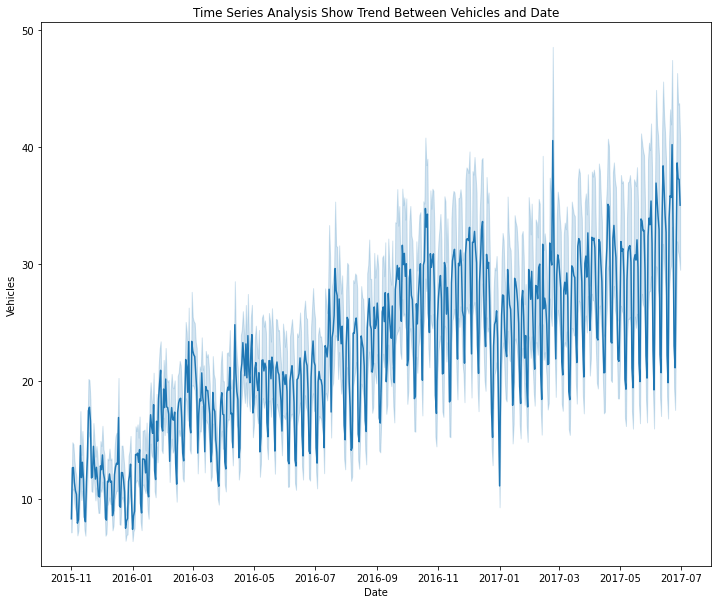

In [92]:
make_time_series_plot()

[Text(0.5, 1.0, 'Time Series Analysis Show Trend Between Vehicles and Day')]

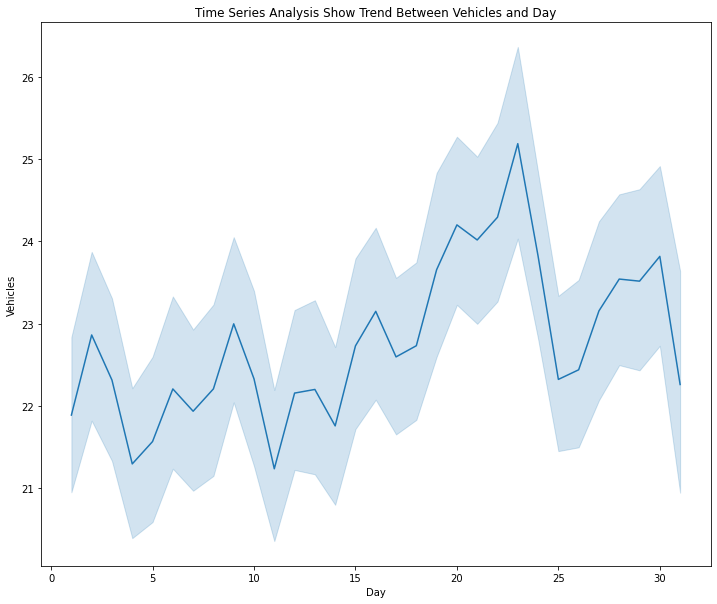

In [93]:

plt.figure(figsize=(12,10))
sns.lineplot(x=df['Day'], y = df['Vehicles'], data=df).set(title="Time Series Analysis Show Trend Between Vehicles and Day")

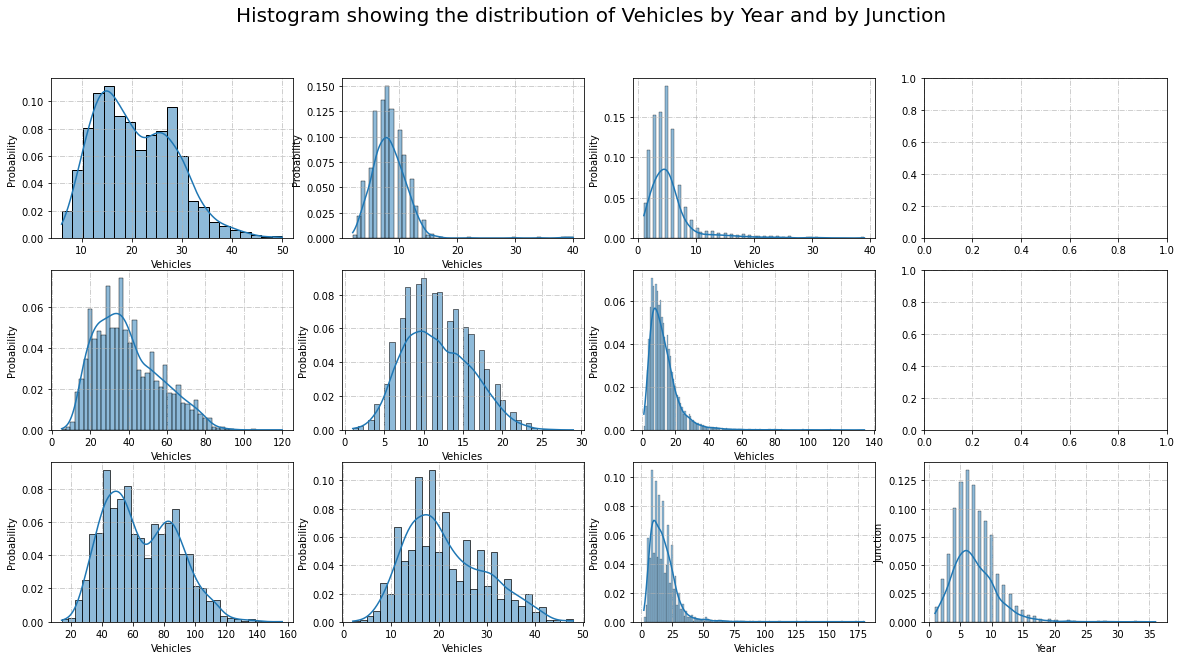

In [28]:
f, axis = plt.subplots(3, 4, figsize=(20, 10))

for i, year in enumerate(range(2015, 2018)):
    for j, junction in enumerate(range(1, 5)):
        sns.histplot(df[(df.Junction == junction) & (df.Year == year)]['Vehicles'], kde=True, ax=axis[i, j], stat='probability')
        axis[i, j].grid(True, alpha=0.75, ls='-.')

plt.xlabel('Year')
plt.ylabel('Junction')
f.suptitle('Histogram showing the distribution of Vehicles by Year and by Junction', fontsize=20)
plt.show()


Z Score data distribution and Histogram with Z Score Vehicles form Data

Mean = 0
Standard Deviation = 1

In [29]:
standardization = lambda x: StandardScaler().fit_transform(x)

In [136]:
z_df = df.copy()
z_df['Vehicles'] = standardization(z_df.Vehicles.values.reshape(-1, 1))
z_df.head()

,Junction,Vehicles,Date,Time,Year,Month,Day,Hour
0,1,-0.375489,2015-11-01,00:00:00,2015,11,1,0
1,1,-0.471875,2015-11-01,01:00:00,2015,11,1,1
2,1,-0.616454,2015-11-01,02:00:00,2015,11,1,2
3,1,-0.761034,2015-11-01,03:00:00,2015,11,1,3
4,1,-0.664648,2015-11-01,04:00:00,2015,11,1,4


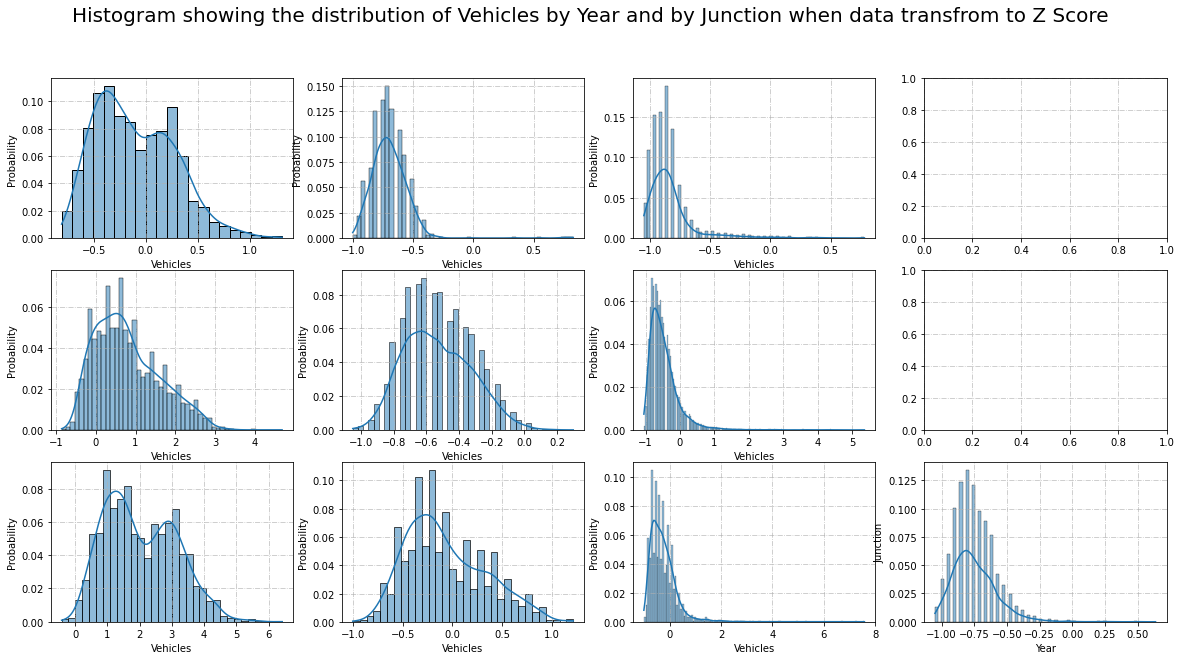

In [31]:
f, axis = plt.subplots(3, 4, figsize=(20, 10))

for i, year in enumerate(range(2015, 2018)):
    for j, junction in enumerate(range(1, 5)):
        sns.histplot(z_df[(z_df.Junction == junction) & (z_df.Year == year)]['Vehicles'], kde=True, ax=axis[i, j], stat='probability')
        axis[i, j].grid(True, alpha=0.75, ls='-.')
    
plt.xlabel('Year')
plt.ylabel('Junction')
f.suptitle('Histogram showing the distribution of Vehicles by Year and by Junction when data transfrom to Z Score', fontsize=20)
plt.show()

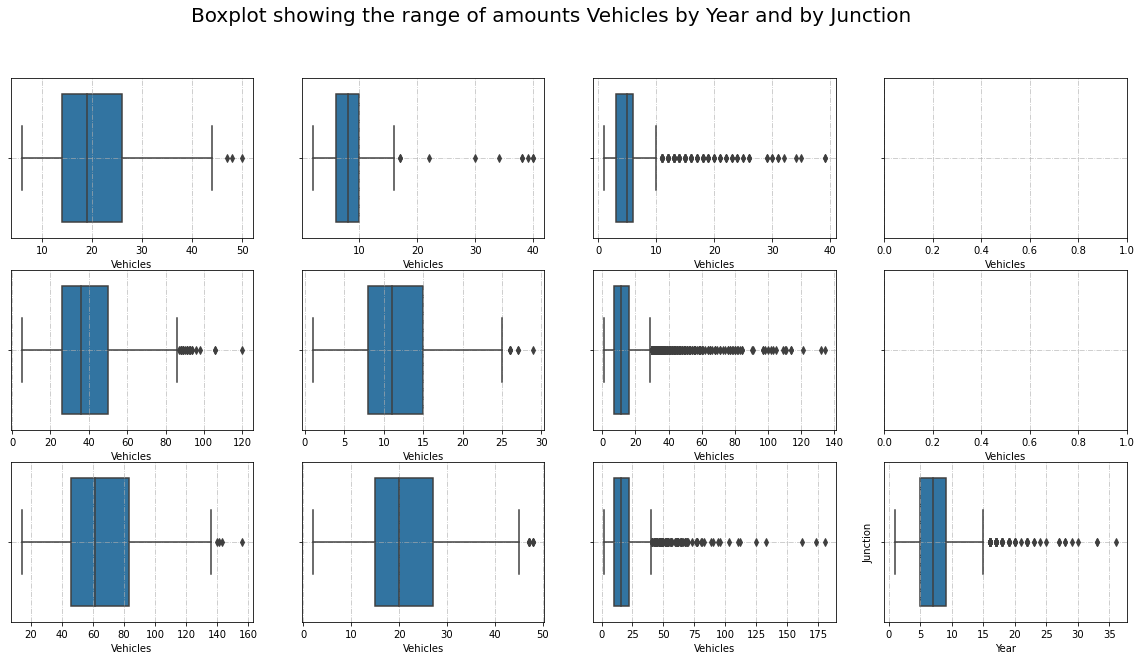

In [32]:
f, axis = plt.subplots(3, 4, figsize=(20, 10))

for i, year in zip(range(3), range(2015, 2018)):
    for j, junction in zip(range(4), range(1, 5)):
        sns.boxplot(x=df[(df.Junction == junction) & (df.Year == year)]['Vehicles'], ax=axis[i, j])
        axis[i, j].grid(True, alpha=0.75, ls='-.')

plt.xlabel('Year')
plt.ylabel('Junction')
f.suptitle('Boxplot showing the range of amounts Vehicles by Year and by Junction', fontsize=20)
plt.show()

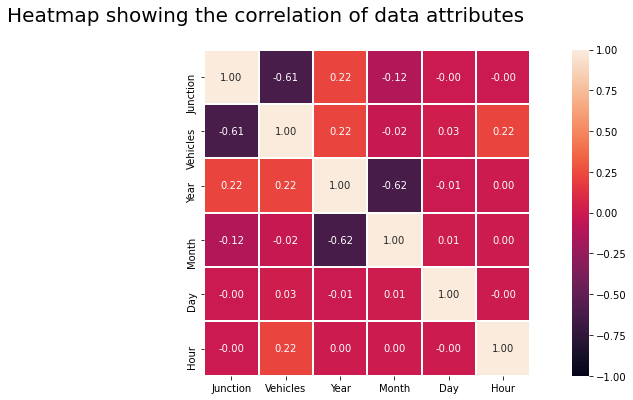

In [33]:
corr = df.corr()
f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(corr, annot=True, fmt='.2f', vmin=-1, vmax=1, square=True, linewidths=1)
f.suptitle('Heatmap showing the correlation of data attributes', fontsize=20)
plt.show()

In [44]:
def get_list_data(dataf, drop=[]):
  # drop cột DateTime ở các data
    for i in drop:
        try:
            dataf.drop(drop, axis=1, inplace=True)
        except:
            print(f"{i} doesn't has in data")
  # create a list of dataframe has the data in that junction and remove the junction identify
    dataf = [dataf[dataf.Junction == i].drop('Junction', axis=1) for i in range(5)]
    return dataf

In [446]:
data = get_list_data(df)
for i in data:
    print(i.head(1))

Empty DataFrame
Columns: [Vehicles, Date, Time, Year, Month, Day, Hour]
Index: []
   Vehicles       Date      Time  Year  Month  Day  Hour
0        15 2015-11-01  00:00:00  2015     11    1     0
       Vehicles       Date      Time  Year  Month  Day  Hour
14592         6 2015-11-01  00:00:00  2015     11    1     0
       Vehicles       Date      Time  Year  Month  Day  Hour
29184         9 2015-11-01  00:00:00  2015     11    1     0
       Vehicles       Date      Time  Year  Month  Day  Hour
43776         3 2017-01-01  00:00:00  2017      1    1     0


In [95]:
def make_autocorrelation(junction=1):
    f, ax = plt.subplots(figsize=(17, 6), nrows=2)
    plot_acf(data[junction].Vehicles, title=f"Autocorrelation of amounts of Vehicles in Junction {junction}", ax=ax[0])
    plot_pacf(data[junction].Vehicles, title=f"Partial Autocorrelation of amounts of Vehicles Junction {junction}", ax=ax[1])
    plt.show()

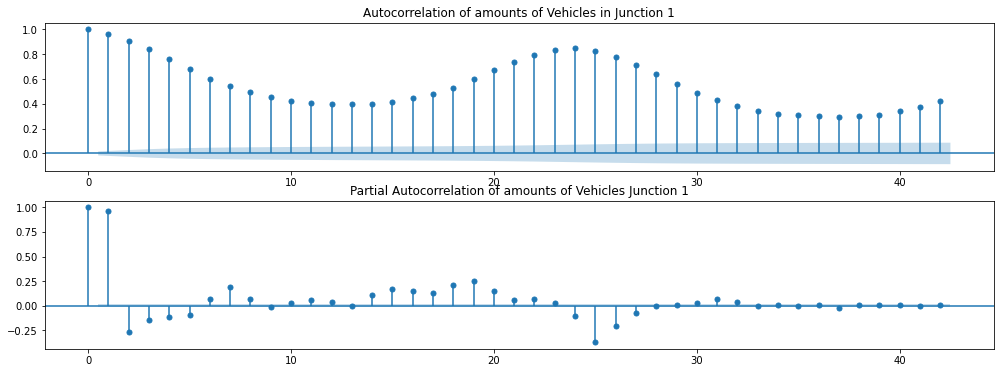

In [96]:
make_autocorrelation(1)

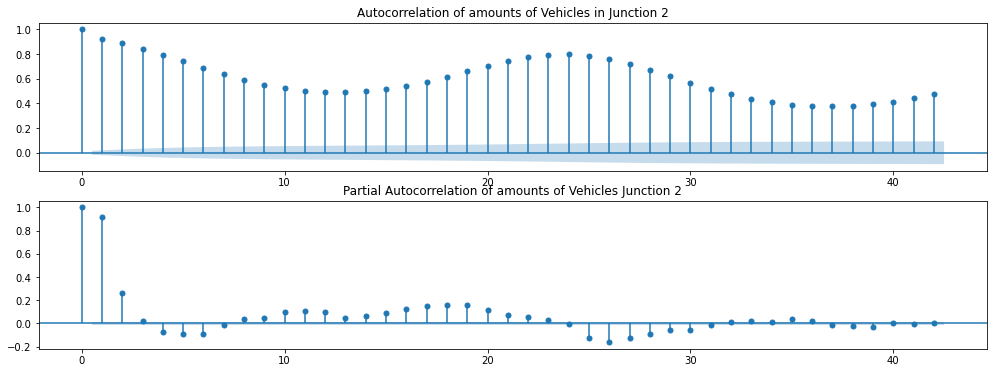

In [97]:
make_autocorrelation(2)

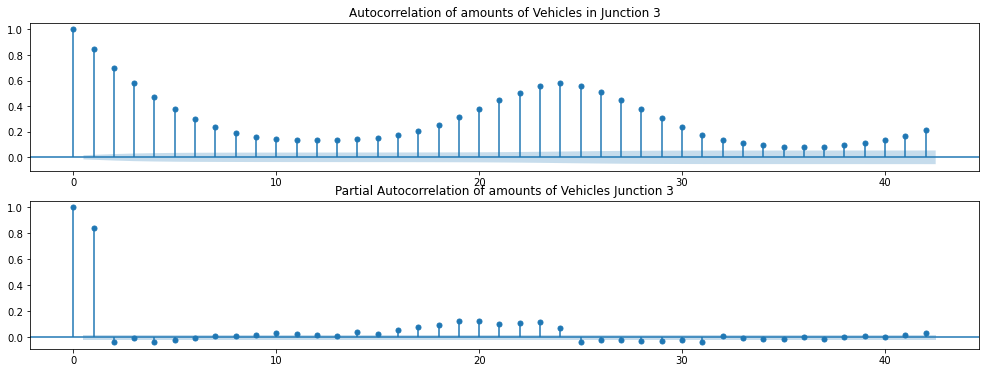

In [98]:
make_autocorrelation(3)

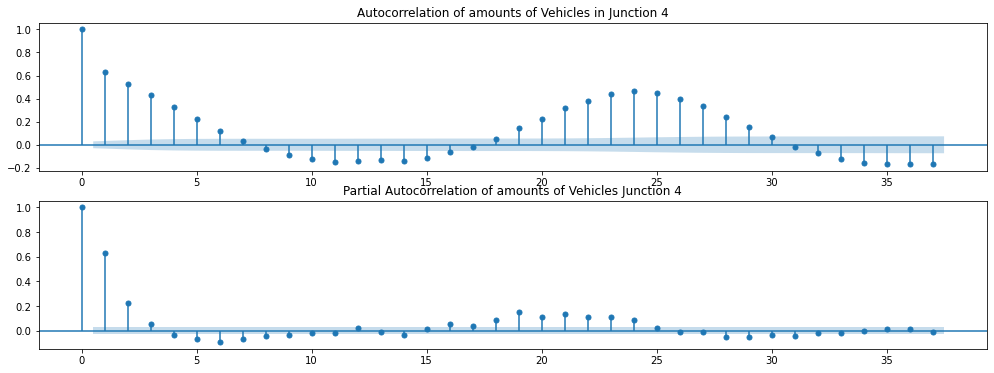

In [99]:
make_autocorrelation(4)

### Modelling

Create a make metrics function to return R² Score and RMSE from a list of models

In [447]:
df['Date'] = pd.to_numeric(pd.to_datetime(df['Date']))
df['Time'] = pd.to_numeric(pd.to_datetime(df['Time']))
df['Year'] = pd.to_numeric(pd.to_datetime(df['Year']))
df['Month'] = pd.to_numeric(pd.to_datetime(df['Month']))
df['Day'] = pd.to_numeric(pd.to_datetime(df['Day']))
df['Hour'] = pd.to_numeric(pd.to_datetime(df['Hour']))


In [448]:

def make_metrics(models):
    data = {
        'name': [model.name for model in models[1:]],
        'r2': [model.r2 for model in models[1:]],
        'rmse': [model.rmse for model in models[1:]]
    }
    data['name'] = 'average R2 and sum RMSE'
    data['r2'].append(np.mean(data['r2']))
    data['rmse'].append(np.sum(data['rmse']))
    return pd.DataFrame(data)

In [449]:
z_data = get_list_data(z_df)
for i in z_data:
    print(i.head(1))

Empty DataFrame
Columns: [Vehicles, Date, Time, Year, Month, Day, Hour]
Index: []
   Vehicles       Date      Time  Year  Month  Day  Hour
0 -0.375489 2015-11-01  00:00:00  2015     11    1     0
       Vehicles       Date      Time  Year  Month  Day  Hour
14592 -0.809227 2015-11-01  00:00:00  2015     11    1     0
       Vehicles       Date      Time  Year  Month  Day  Hour
29184 -0.664648 2015-11-01  00:00:00  2015     11    1     0
       Vehicles       Date      Time  Year  Month  Day  Hour
43776 -0.953806 2017-01-01  00:00:00  2017      1    1     0


In [474]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [455]:
x =  df.drop(['Junction', 'Date', 'Time'], axis=1)
y =  df['Junction']

In [456]:
x.shape, y.shape

((48120, 5), (48120,))

In [518]:
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=0.25, random_state =  1)

In [460]:
x_train.shape

(36090, 5)

In [461]:
y_train.shape

(36090,)

In [462]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(max_depth=4)
classifier.fit(x_train, y_train)
predicted=classifier.predict(x_test)
print("\n Predicted value:\n",predicted)


 Predicted value:
 [2 1 2 ... 1 2 1]


In [479]:
from sklearn import metrics
DecisionTree= metrics.accuracy_score(y_test, predicted) * 100
print("\n The Accuracy Score Using Algorithm - \n Decision Tree Classifier: ", round(DecisionTree, 2), "%")


 The Accuracy Score Using Algorithm - 
 Decision Tree Classifier:  67.14 %


#### USING LINEAR REGRESSION CLASSIFIER

In [463]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [464]:
model = LinearRegression()
model

LinearRegression()

In [485]:
print(x_train.shape,y_train.shape)

(36090, 5) (36090,)


In [467]:

model.fit(x_train, y_train)

LinearRegression()

In [539]:
ry_score = model.score(x,y)*100
print("coefficient of train determination: ", round(ry_score, 2), "%")

coefficient of train determination:  55.22 %


In [311]:
ry_intercept = model.intercept_
print(f"Coefficient of the intercept {ry_intercept}")

Coefficient of the intercept -12467.36458122589


In [321]:
ry_slope = model.coef_
print(f"Coefficient of the intercept {ry_slope}")

Coefficient of the intercept [-3.52264847e-02  6.45116325e-15  7.71303858e-01  4.46275987e-02
  2.32898493e-03 -7.12073299e-16]


Predict response

Once you have a satisfactory model, then you can use it for predictions with either existing or new data. To obtain the predicted response, use .predict():

In [532]:

y_pred = model.predict(x_test)
y_pred

array([ 2.13119176, -0.17582864,  2.27611857, ...,  1.53365649,
        2.67730609,  0.90129106])

In [533]:
y_test = np.array(y_test*1.0)
y_test

array([3., 1., 2., ..., 1., 2., 1.])

In [538]:
test_score = model.score(x_test,y_test) *100
print(f"test score from the Algorithm is {round(test_score,2)} %")

test score from the Algorithm is 55.27 %


### RECOMMENDATION
from the above it is deduce that Decision Tree has a Better Prediction 
for Traffic Modelling